In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [3]:
x = df.iloc[:,[2,3]].values
y = df.iloc[:,4].values

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=.25, random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [6]:
from sklearn.svm import SVC
model = SVC(kernel = 'rbf', random_state = 0)
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [7]:
y_pred = model.predict(x_test)

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

## k-Fold cross validation

In [9]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=model, X = x_train, y = y_train,cv=10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

In [10]:
print(accuracies)

[0.80645161 0.96666667 0.8        0.93333333 0.86666667 0.83333333
 0.93333333 0.93333333 0.96666667 0.96551724]


In [11]:
accuracies.mean()

0.9005302187615868

In [12]:
accuracies.std()

0.06388957356626285

## Applying Grid Search for best model & best parameters

In [13]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1,10,100,200], 'kernel': ['linear']},
             {'C': [1,10,100,200], 'kernel': ['rbf'], 'gamma': [.1,.2,.3,.4,.5,.6,.7,.8,.9]}]

grid_search = GridSearchCV(estimator=model,
                          param_grid=parameters,
                          scoring = 'accuracy',
                          cv =10,
                          n_jobs=-1)

In [14]:
grid_search = grid_search.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [15]:
best_accuracy = grid_search.best_score_
best_accuracy

0.9033333333333333

In [16]:
best_parameters = grid_search.best_params_
best_parameters

{'C': 1, 'gamma': 0.7, 'kernel': 'rbf'}

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


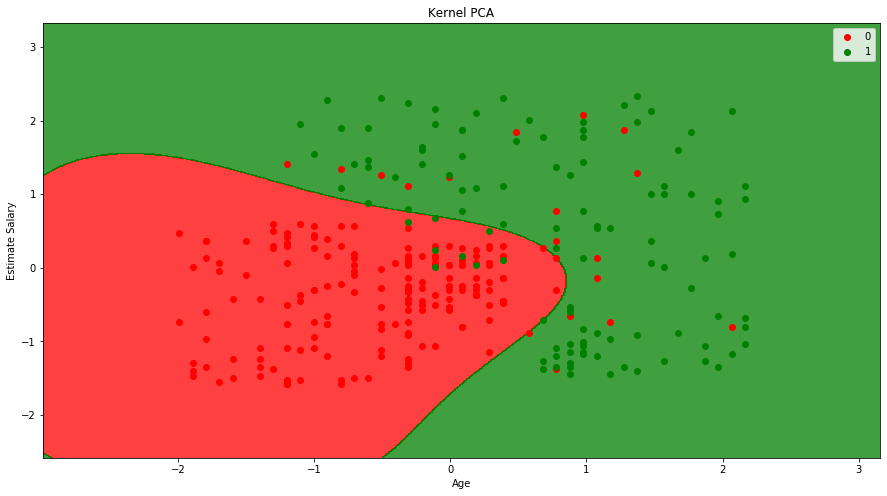

In [17]:
plt.figure(figsize=(15,8))
from matplotlib.colors import ListedColormap
x_set,y_set = x_train,y_train
x1,x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1, step=.01),
                   np.arange(start=x_set[:,1].min() -1, stop=x_set[:,1].max()+1, step=.01))
plt.contourf(x1,x2,model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha=.75, cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
               c = ListedColormap(('red','green'))(i), label=j)
plt.title('Kernel PCA')
plt.xlabel('Age')
plt.ylabel('Estimate Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


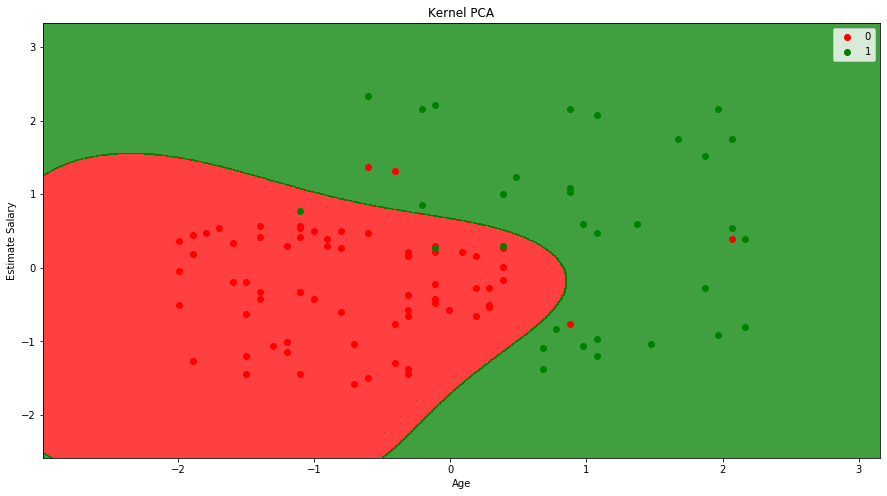

In [18]:
plt.figure(figsize=(15,8))
from matplotlib.colors import ListedColormap
x_set,y_set = x_test,y_test
x1,x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1, step=.01),
                   np.arange(start=x_set[:,1].min() -1, stop=x_set[:,1].max()+1, step=.01))
plt.contourf(x1,x2,model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha=.75, cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
               c = ListedColormap(('red','green'))(i), label=j)
plt.title('Kernel PCA')
plt.xlabel('Age')
plt.ylabel('Estimate Salary')
plt.legend()
plt.show()